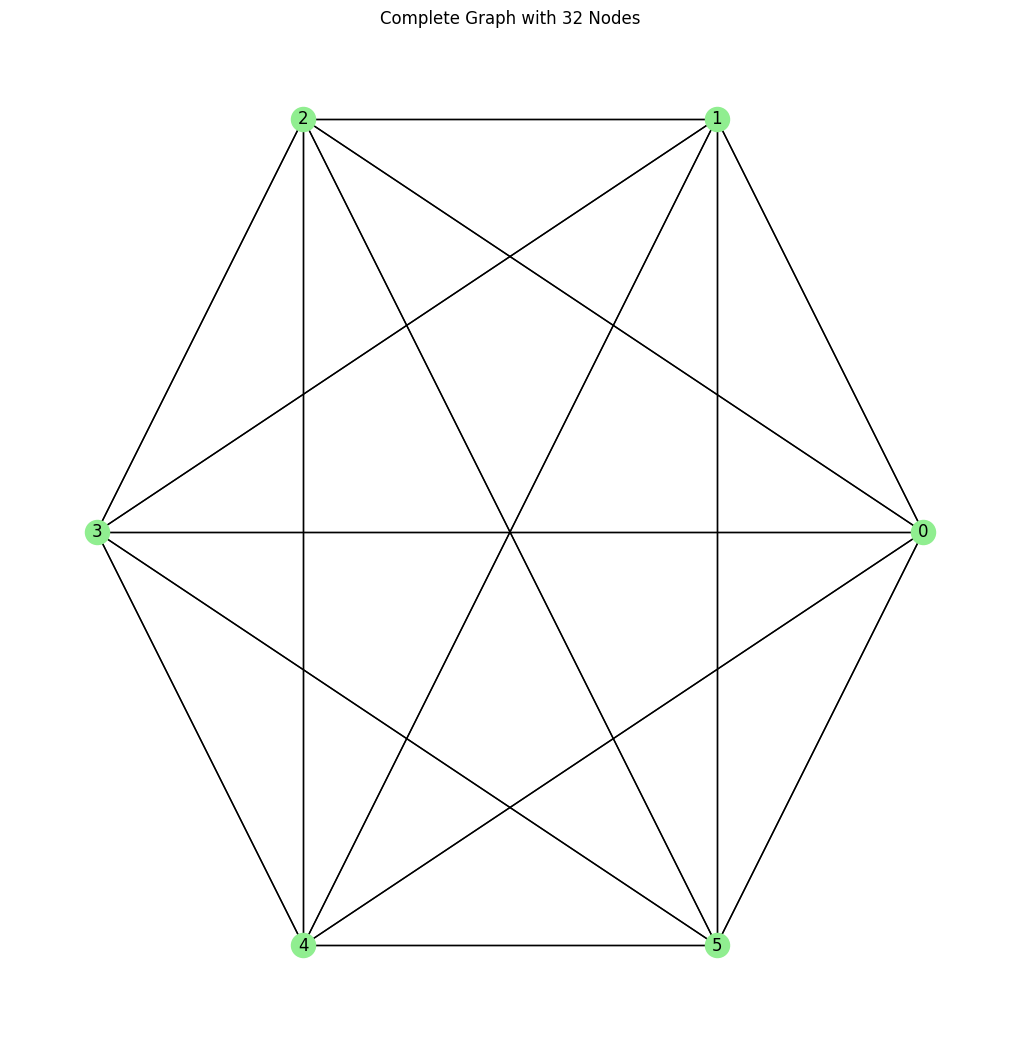

In [32]:
from topology import generate_complete_graph, draw_graph

G = generate_complete_graph(6)
draw_graph(G)


# Slicing

In [54]:
from generate_slices import generate_random_slices, vnf_profiles

slices = generate_random_slices(G, vnf_profiles, 3)

print (slices)

[([{'id': 'vnf0_0', 'cpu': 3}, {'id': 'vnf0_1', 'cpu': 3}, {'id': 'vnf0_2', 'cpu': 3}], [{'from': 'vnf0_0', 'to': 'vnf0_1', 'bandwidth': 80, 'latency': 25}, {'from': 'vnf0_1', 'to': 'vnf0_2', 'bandwidth': 80, 'latency': 25}]), ([{'id': 'vnf1_0', 'cpu': 1}, {'id': 'vnf1_1', 'cpu': 1}, {'id': 'vnf1_2', 'cpu': 1}], [{'from': 'vnf1_0', 'to': 'vnf1_1', 'bandwidth': 120, 'latency': 25}, {'from': 'vnf1_1', 'to': 'vnf1_2', 'bandwidth': 120, 'latency': 25}]), ([{'id': 'vnf2_0', 'cpu': 2}, {'id': 'vnf2_1', 'cpu': 2}, {'id': 'vnf2_2', 'cpu': 2}], [{'from': 'vnf2_0', 'to': 'vnf2_1', 'bandwidth': 100, 'latency': 25}, {'from': 'vnf2_1', 'to': 'vnf2_2', 'bandwidth': 100, 'latency': 25}])]


[codecarbon INFO @ 13:25:10] Energy consumed for RAM : 0.011193 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 13:25:10] Delta energy consumed for CPU with constant : 0.000159 kWh, power : 42.5 W
[codecarbon INFO @ 13:25:10] Energy consumed for All CPU : 0.047580 kWh
[codecarbon INFO @ 13:25:11] Energy consumed for all GPUs : 0.003164 kWh. Total GPU Power : 2.121705199854717 W
[codecarbon INFO @ 13:25:11] 0.061936 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:25:25] Energy consumed for RAM : 0.011230 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 13:25:25] Delta energy consumed for CPU with constant : 0.000159 kWh, power : 42.5 W
[codecarbon INFO @ 13:25:25] Energy consumed for All CPU : 0.047739 kWh
[codecarbon INFO @ 13:25:26] Energy consumed for all GPUs : 0.003171 kWh. Total GPU Power : 1.9204634255710678 W
[codecarbon INFO @ 13:25:26] 0.062139 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:25:39] Energy consumed for RAM : 0.011267 kWh. RAM Power : 

In [72]:
from run_abo_full_batch import run_abo_full_batch

node_capacity = {node: 10 for node in G.nodes}
link_latency = {(u, v): G[u][v]['latency'] for u, v in G.edges}
link_capacity = {(u, v): G[u][v]['capacity'] for u, v in G.edges}

df_results, abo_results = run_abo_full_batch(
    G,
    slices,
    node_capacity,            
    link_latency,             
    link_capacity             
)

print (df_results)

print (abo_results)

   slice  accepted  g_cost
0      1      True     160
1      2      True     240
2      3      True     200
[<run_abo_full_batch.ABOState object at 0x7fefeac02990>, <run_abo_full_batch.ABOState object at 0x7fefeaf14bc0>, <run_abo_full_batch.ABOState object at 0x7fefeac03bf0>]


In [62]:
# Recreate the DataFrame from stored slices (reconstruct summary if needed)
abo_summary = []
for i, result in enumerate(abo_results):
    abo_summary.append({
        "slice": i + 1,
        "accepted": result is not None,
        "g_cost": result.g_cost if result else None
    })

# Compute metrics
accepted_costs = [entry["g_cost"] for entry in abo_summary if entry["accepted"]]
average_g_cost = sum(accepted_costs) / len(accepted_costs)
min_g_cost = min(accepted_costs)
max_g_cost = max(accepted_costs)

# Display metrics
{
    "Average g_cost (Mbps)": average_g_cost,
    "Min g_cost (Mbps)": min_g_cost,
    "Max g_cost (Mbps)": max_g_cost,
    "Total slices": len(abo_summary),
    "Accepted slices": len(accepted_costs),
    "Acceptance rate (%)": (len(accepted_costs) / len(abo_summary)) * 100
}


{'Average g_cost (Mbps)': 200.0,
 'Min g_cost (Mbps)': 160,
 'Max g_cost (Mbps)': 240,
 'Total slices': 3,
 'Accepted slices': 3,
 'Acceptance rate (%)': 100.0}

[codecarbon INFO @ 15:04:49] Energy consumed for RAM : 0.026166 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 15:04:49] Delta energy consumed for CPU with constant : 0.000158 kWh, power : 42.5 W
[codecarbon INFO @ 15:04:49] Energy consumed for All CPU : 0.111230 kWh
[codecarbon INFO @ 15:04:51] Energy consumed for all GPUs : 0.006985 kWh. Total GPU Power : 3.008800482169182 W
[codecarbon INFO @ 15:04:51] 0.144381 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:05:34] Energy consumed for RAM : 0.026278 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 15:05:34] Delta energy consumed for CPU with constant : 0.000158 kWh, power : 42.5 W
[codecarbon INFO @ 15:05:34] Energy consumed for All CPU : 0.111704 kWh
[codecarbon INFO @ 15:05:36] Energy consumed for all GPUs : 0.007014 kWh. Total GPU Power : 2.579160565394128 W
[codecarbon INFO @ 15:05:36] 0.144996 kWh of electricity used since the beginning.


In [74]:
from compute_energy import compute_energy
import pandas as pd
cpu_usage, energy_per_node = compute_energy(abo_results, slices, node_capacity)

df_energy = pd.DataFrame({
    "CPU used": cpu_usage,
    "Energy (W)": energy_per_node
}).fillna(0).astype({"CPU used": int, "Energy (W)": float})


df_energy = df_energy.sort_values(by="Energy (W)", ascending=False)
df_energy.head()


,CPU used,Energy (W)
4,9,23.0
5,6,17.0
1,2,9.0
2,1,7.0
0,0,0.0


[codecarbon INFO @ 07:50:51] Energy consumed for RAM : 0.041748 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 07:50:51] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 07:50:51] Energy consumed for All CPU : 0.177463 kWh
[codecarbon INFO @ 07:50:53] Energy consumed for all GPUs : 0.011802 kWh. Total GPU Power : 3.564695980111782 W
[codecarbon INFO @ 07:50:53] 0.231013 kWh of electricity used since the beginning.
[codecarbon INFO @ 07:51:36] Energy consumed for RAM : 0.041860 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 07:51:36] Delta energy consumed for CPU with constant : 0.000159 kWh, power : 42.5 W
[codecarbon INFO @ 07:51:36] Energy consumed for All CPU : 0.177942 kWh
[codecarbon INFO @ 07:51:38] Energy consumed for all GPUs : 0.011854 kWh. Total GPU Power : 4.095490132317377 W
[codecarbon INFO @ 07:51:38] 0.231656 kWh of electricity used since the beginning.
[codecarbon INFO @ 07:52:21] Energy consumed for RAM : 0.041973 kWh. RAM Power : 1